In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split # data split
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [9]:
df = pd.read_csv("../dados/df_setorizado.csv")

In [10]:
df.head(3)

,id,ano_documento,assinaturas,descricao_tipo_documento,decisao_tribunal,setor_economico,grupo_setor,id_unidade,data_processo,data_documento,diferenca_dias,mercado_relevante,descricao_especificacao,conteudo,resumo
0,abbdc450-7ff1-4990-9bcc-8ae4386592f0,2024,Outras,Voto Processo Administrativo,vazio,Fabricação de Peças e Acessórios para o Sistem...,Indústria Automotiva,110000967.0,2019-09-13,2024-05-23,1714,"pistões de motor, bronzinas, camisas, pinos, b...","- Desmembrado Bernd Brünig, Faustino Luigi Mi...",SEI/CADE - 1390607 - Voto Processo Administrat...,"['\nREPRESENTADOS(AS): BERND BRÜNIG, FAUSTINO ..."
1,b41e8f1f-449e-4d28-a574-18f365d32b6f,2024,Gustavo Augusto Freitas de Lima,Voto Processo Administrativo,condenacao,Gestão e Administração da Propriedade Imobiliária,Gestão Imobiliária,110000969.0,2015-05-21,2024-05-09,3276,Mercado imobiliário,Influencia de conduta uniforme - COFECI,SEI/CADE - 1384594 - Voto Processo Administrat...,"['\nNOS TERMOS DO VOTO RECORRIDO, ESTE TRIBUNA..."
2,adec625d-4f5e-4514-b938-a295fdc1e8a4,2024,Outras,Voto,arquivamento,"Comércio Atacadista de Combustíveis Sólidos, L...",Comércio de Combustíveis,110001021.0,2022-08-08,2024-05-09,640,Postos de gasolina,Ministério Público do Estado de Minas Gerais,SEI/CADE - 1384685 - Voto\n\n\nProcesso nº 087...,['\nREPRESENTADOS(AS): AUTO POSTO PACAEMBU LTD...


In [25]:
df['grupo_setor'].value_counts()

grupo_setor
Indústria Química            32
Construção Civil             26
Comércio de Combustíveis     24
Indústria Automotiva         21
Setor de Energia             19
Representantes Comerciais    14
Outros                       12
Transporte de Carga          11
Telecomunicações             10
Comércio Varejista           10
Saúde e Farmácia              7
Indústria de Medição          5
Gestão Imobiliária            4
Logística Portuária           3
Alimentos Preparados          2
Name: count, dtype: int64

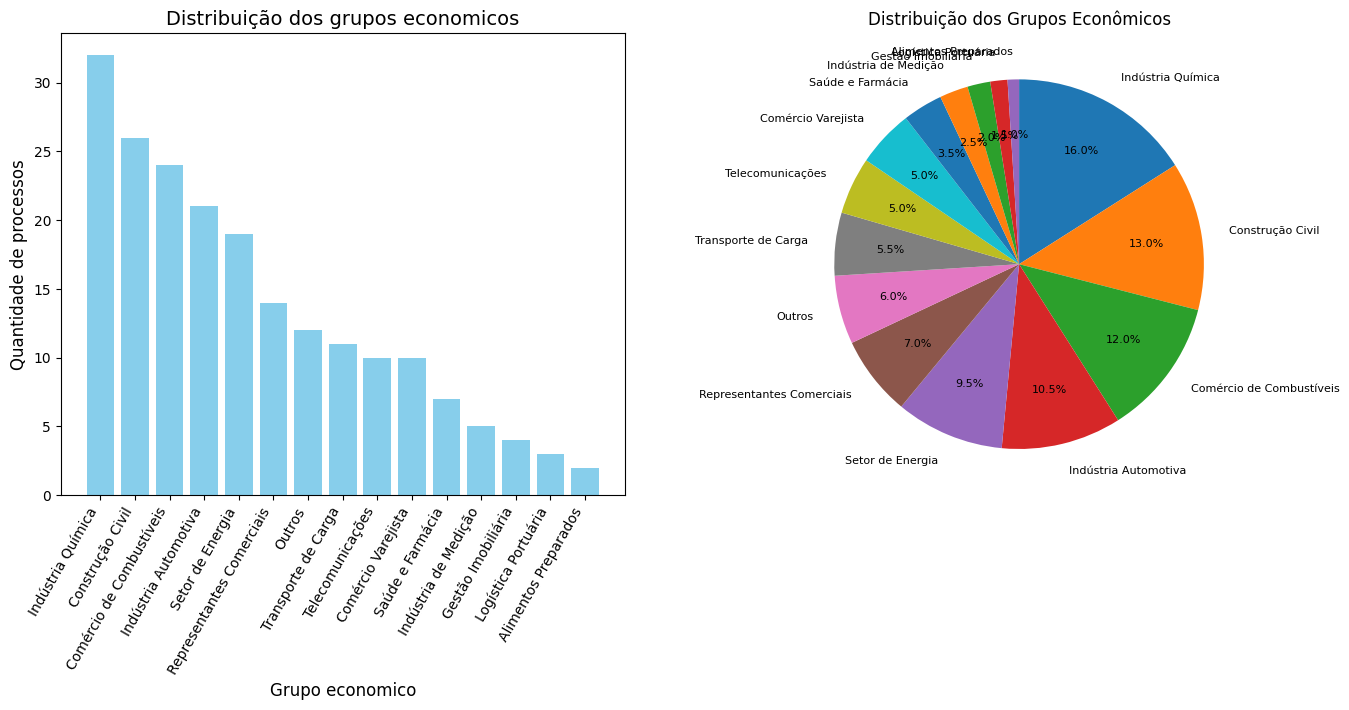

In [56]:
plt.figure(figsize=(16,6))

contagem = df['grupo_setor'].value_counts()

plt.subplot(121)
plt.bar(contagem.index, contagem.values, color='skyblue')
#plt.plot(contagem.index, contagem.values, color='blue', marker='o', linestyle='--', label='Tendência')
plt.title('Distribuição dos grupos economicos', fontsize = 14)
plt.xlabel('Grupo economico', fontsize = 12)
plt.ylabel('Quantidade de processos', fontsize = 12)
plt.xticks(rotation=60, ha='right')
plt.yticks(fontsize = 10)


plt.subplot(122)
plt.pie(
    contagem.values, 
    labels=contagem.index, 
    autopct='%1.1f%%',        
    startangle=90,            
    counterclock=False,
    labeldistance=1.15,
    pctdistance=0.7,
    textprops={'fontsize': 8}  
)
plt.title('Distribuição dos Grupos Econômicos')

plt.show()

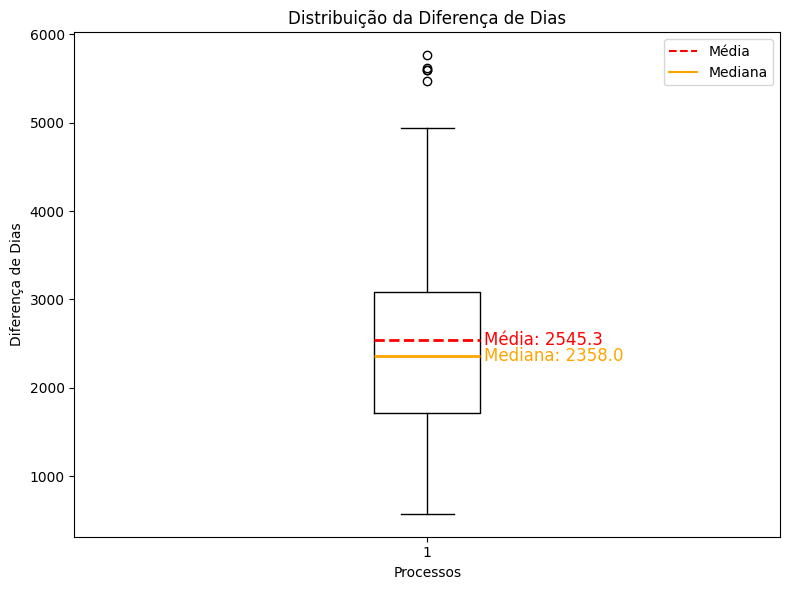

In [39]:
# Supondo que df já está definido
dados = df['diferenca_dias']

media = np.mean(dados)
mediana = np.median(dados)

fig, ax = plt.subplots(figsize=(8,6))

box = ax.boxplot(dados, showmeans=True, meanline=True,
                 meanprops=dict(color='red', linewidth=2),
                 medianprops=dict(color='orange', linewidth=2))

ax.set_title('Distribuição da Diferença de Dias')
ax.set_xlabel('Processos')
ax.set_ylabel('Diferença de Dias')

# Adiciona legenda
ax.annotate(f'Média: {media:.1f}', xy=(1.08, media), xycoords=('data', 'data'),
            color='red', fontsize=12, va='center')
ax.annotate(f'Mediana: {mediana:.1f}', xy=(1.08, mediana), xycoords=('data', 'data'),
            color='orange', fontsize=12, va='center')

# Adiciona legenda
import matplotlib.lines as mlines
mean_line = mlines.Line2D([], [], color='red',linestyle='--', label='Média')
median_line = mlines.Line2D([], [], color='orange', label='Mediana')
ax.legend(handles=[mean_line, median_line])

plt.tight_layout()
plt.show()